# Pandas and Elasticsearch - Demo Day 15th August 2019

Create simple pandas DataFrame

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

Read JSON file to pandas DataFrame

In [2]:
pd_flights = pd.read_json('./flights_df.json.gz').sort_index()

# Change data types of a couple of fields
pd_flights['timestamp'] = pd.to_datetime(pd_flights['timestamp'])
pd_flights.index = pd_flights.index.map(str)

Explore pandas DataFrame

In [3]:
# Show consise summary of DataFrame + memory usage
pd_flights.info()

<class 'pandas.core.frame.DataFrame'>
Index: 13059 entries, 0 to 13058
Data columns (total 27 columns):
AvgTicketPrice        13059 non-null float64
Cancelled             13059 non-null bool
Carrier               13059 non-null object
Dest                  13059 non-null object
DestAirportID         13059 non-null object
DestCityName          13059 non-null object
DestCountry           13059 non-null object
DestLocation          13059 non-null object
DestRegion            13059 non-null object
DestWeather           13059 non-null object
DistanceKilometers    13059 non-null float64
DistanceMiles         13059 non-null float64
FlightDelay           13059 non-null bool
FlightDelayMin        13059 non-null int64
FlightDelayType       13059 non-null object
FlightNum             13059 non-null object
FlightTimeHour        13059 non-null float64
FlightTimeMin         13059 non-null float64
Origin                13059 non-null object
OriginAirportID       13059 non-null object
OriginCityName  

In [4]:
# Generate descriptive statistics of numeric columns
pd_flights.describe()

,AvgTicketPrice,DistanceKilometers,DistanceMiles,FlightDelayMin,FlightTimeHour,FlightTimeMin,dayOfWeek
count,13059.000000,13059.000000,13059.000000,13059.000000,13059.000000,13059.000000,13059.000000
mean,628.253689,7092.142455,4406.853013,47.335171,8.518797,511.127842,2.835975
std,266.396861,4578.438497,2844.909787,96.746711,5.579233,334.753952,1.939439
min,100.020528,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,409.893816,2459.705673,1528.390247,0.000000,4.205553,252.333192,1.000000
50%,640.556668,7610.330866,4728.840363,0.000000,8.384086,503.045170,3.000000
75%,842.185470,9736.637600,6050.066114,15.000000,12.006934,720.416036,4.000000
max,1199.729053,19881.482315,12353.780369,360.000000,31.715034,1902.902032,6.000000


In [5]:
pd_flights.head()

,AvgTicketPrice,Cancelled,Carrier,Dest,DestAirportID,DestCityName,DestCountry,DestLocation,DestRegion,DestWeather,...,FlightTimeMin,Origin,OriginAirportID,OriginCityName,OriginCountry,OriginLocation,OriginRegion,OriginWeather,dayOfWeek,timestamp
0,841.265642,False,Kibana Airlines,Sydney Kingsford Smith International Airport,SYD,Sydney,AU,"{'lat': '-33.94609833', 'lon': '151.177002'}",SE-BD,Rain,...,1030.770416,Frankfurt am Main Airport,FRA,Frankfurt am Main,DE,"{'lat': '50.033333', 'lon': '8.570556'}",DE-HE,Sunny,0,2018-01-01 00:00:00
1,882.982662,False,Logstash Airways,Venice Marco Polo Airport,VE05,Venice,IT,"{'lat': '45.505299', 'lon': '12.3519'}",IT-34,Sunny,...,464.389481,Cape Town International Airport,CPT,Cape Town,ZA,"{'lat': '-33.96480179', 'lon': '18.60169983'}",SE-BD,Clear,0,2018-01-01 18:27:00
2,190.636904,False,Logstash Airways,Venice Marco Polo Airport,VE05,Venice,IT,"{'lat': '45.505299', 'lon': '12.3519'}",IT-34,Cloudy,...,0.000000,Venice Marco Polo Airport,VE05,Venice,IT,"{'lat': '45.505299', 'lon': '12.3519'}",IT-34,Rain,0,2018-01-01 17:11:14
3,181.694216,True,Kibana Airlines,Treviso-Sant'Angelo Airport,TV01,Treviso,IT,"{'lat': '45.648399', 'lon': '12.1944'}",IT-34,Clear,...,222.749059,Naples International Airport,NA01,Naples,IT,"{'lat': '40.886002', 'lon': '14.2908'}",IT-72,Thunder & Lightning,0,2018-01-01 10:33:28
4,730.041778,False,Kibana Airlines,Xi'an Xianyang International Airport,XIY,Xi'an,CN,"{'lat': '34.447102', 'lon': '108.751999'}",SE-BD,Clear,...,785.779071,Licenciado Benito Juarez International Airport,AICM,Mexico City,MX,"{'lat': '19.4363', 'lon': '-99.072098'}",MX-DIF,Damaging Wind,0,2018-01-01 05:13:00


In [6]:
pd_flights.tail()

,AvgTicketPrice,Cancelled,Carrier,Dest,DestAirportID,DestCityName,DestCountry,DestLocation,DestRegion,DestWeather,...,FlightTimeMin,Origin,OriginAirportID,OriginCityName,OriginCountry,OriginLocation,OriginRegion,OriginWeather,dayOfWeek,timestamp
13054,1080.446279,False,Logstash Airways,Xi'an Xianyang International Airport,XIY,Xi'an,CN,"{'lat': '34.447102', 'lon': '108.751999'}",SE-BD,Rain,...,402.929088,Pisa International Airport,PI05,Pisa,IT,"{'lat': '43.683899', 'lon': '10.3927'}",IT-52,Sunny,6,2018-02-11 20:42:25
13055,646.612941,False,Logstash Airways,Zurich Airport,ZRH,Zurich,CH,"{'lat': '47.464699', 'lon': '8.54917'}",CH-ZH,Rain,...,644.418029,Winnipeg / James Armstrong Richardson Internat...,YWG,Winnipeg,CA,"{'lat': '49.90999985', 'lon': '-97.23989868'}",CA-MB,Rain,6,2018-02-11 01:41:57
13056,997.751876,False,Logstash Airways,Ukrainka Air Base,XHBU,Belogorsk,RU,"{'lat': '51.169997', 'lon': '128.445007'}",RU-AMU,Rain,...,937.540811,Licenciado Benito Juarez International Airport,AICM,Mexico City,MX,"{'lat': '19.4363', 'lon': '-99.072098'}",MX-DIF,Sunny,6,2018-02-11 04:09:27
13057,1102.814465,False,JetBeats,Ministro Pistarini International Airport,EZE,Buenos Aires,AR,"{'lat': '-34.8222', 'lon': '-58.5358'}",SE-BD,Hail,...,1697.404971,Itami Airport,ITM,Osaka,JP,"{'lat': '34.78549957', 'lon': '135.4380035'}",SE-BD,Hail,6,2018-02-11 08:28:21
13058,858.144337,False,JetBeats,Washington Dulles International Airport,IAD,Washington,US,"{'lat': '38.94449997', 'lon': '-77.45580292'}",US-DC,Heavy Fog,...,1610.761827,Adelaide International Airport,ADL,Adelaide,AU,"{'lat': '-34.945', 'lon': '138.531006'}",SE-BD,Rain,6,2018-02-11 14:54:34


In [7]:
pd_flights

,AvgTicketPrice,Cancelled,Carrier,Dest,DestAirportID,DestCityName,DestCountry,DestLocation,DestRegion,DestWeather,...,FlightTimeMin,Origin,OriginAirportID,OriginCityName,OriginCountry,OriginLocation,OriginRegion,OriginWeather,dayOfWeek,timestamp
0,841.265642,False,Kibana Airlines,Sydney Kingsford Smith International Airport,SYD,Sydney,AU,"{'lat': '-33.94609833', 'lon': '151.177002'}",SE-BD,Rain,...,1030.770416,Frankfurt am Main Airport,FRA,Frankfurt am Main,DE,"{'lat': '50.033333', 'lon': '8.570556'}",DE-HE,Sunny,0,2018-01-01 00:00:00
1,882.982662,False,Logstash Airways,Venice Marco Polo Airport,VE05,Venice,IT,"{'lat': '45.505299', 'lon': '12.3519'}",IT-34,Sunny,...,464.389481,Cape Town International Airport,CPT,Cape Town,ZA,"{'lat': '-33.96480179', 'lon': '18.60169983'}",SE-BD,Clear,0,2018-01-01 18:27:00
2,190.636904,False,Logstash Airways,Venice Marco Polo Airport,VE05,Venice,IT,"{'lat': '45.505299', 'lon': '12.3519'}",IT-34,Cloudy,...,0.000000,Venice Marco Polo Airport,VE05,Venice,IT,"{'lat': '45.505299', 'lon': '12.3519'}",IT-34,Rain,0,2018-01-01 17:11:14
3,181.694216,True,Kibana Airlines,Treviso-Sant'Angelo Airport,TV01,Treviso,IT,"{'lat': '45.648399', 'lon': '12.1944'}",IT-34,Clear,...,222.749059,Naples International Airport,NA01,Naples,IT,"{'lat': '40.886002', 'lon': '14.2908'}",IT-72,Thunder & Lightning,0,2018-01-01 10:33:28
4,730.041778,False,Kibana Airlines,Xi'an Xianyang International Airport,XIY,Xi'an,CN,"{'lat': '34.447102', 'lon': '108.751999'}",SE-BD,Clear,...,785.779071,Licenciado Benito Juarez International Airport,AICM,Mexico City,MX,"{'lat': '19.4363', 'lon': '-99.072098'}",MX-DIF,Damaging Wind,0,2018-01-01 05:13:00
5,418.152089,False,JetBeats,Genoa Cristoforo Colombo Airport,GE01,Genova,IT,"{'lat': '44.4133', 'lon': '8.8375'}",IT-42,Thunder & Lightning,...,393.590441,Edmonton International Airport,CYEG,Edmonton,CA,"{'lat': '53.30970001', 'lon': '-113.5800018'}",CA-AB,Rain,0,2018-01-01 01:43:03
6,180.246816,False,JetBeats,Zurich Airport,ZRH,Zurich,CH,"{'lat': '47.464699', 'lon': '8.54917'}",CH-ZH,Hail,...,300.000000,Zurich Airport,ZRH,Zurich,CH,"{'lat': '47.464699', 'lon': '8.54917'}",CH-ZH,Clear,0,2018-01-01 13:49:53
7,585.184310,False,Kibana Airlines,Ottawa Macdonald-Cartier International Airport,YOW,Ottawa,CA,"{'lat': '45.32249832', 'lon': '-75.66919708'}",CA-ON,Clear,...,614.942480,Ciampino___G. B. Pastine International Airport,RM12,Rome,IT,"{'lat': '41.7994', 'lon': '12.5949'}",IT-62,Thunder & Lightning,0,2018-01-01 04:54:59
8,960.869736,True,Kibana Airlines,Rajiv Gandhi International Airport,HYD,Hyderabad,IN,"{'lat': '17.23131752', 'lon': '78.42985535'}",SE-BD,Cloudy,...,602.030591,Milano Linate Airport,MI11,Milan,IT,"{'lat': '45.445099', 'lon': '9.27674'}",IT-25,Heavy Fog,0,2018-01-01 12:09:35
9,296.877773,False,Logstash Airways,Treviso-Sant'Angelo Airport,TV01,Treviso,IT,"{'lat': '45.648399', 'lon': '12.1944'}",IT-34,Rain,...,174.822216,Sheremetyevo International Airport,SVO,Moscow,RU,"{'lat': '55.972599', 'lon': '37.4146'}",RU-MOS,Cloudy,0,2018-01-01 12:09:35


---
Create `eland` DataFrame (pandas-like DataFrame backed by Elasticsearch rather than pandas incore memory structures)

In [8]:
import eland as ed

In [9]:
ed_flights = ed.read_es("localhost", "flights")

Alternative Constructors

In [10]:
from elasticsearch import Elasticsearch

es = Elasticsearch([
    {'host': 'localhost', 'port': 9200, 'use_ssl': False}, # full range of connection options
])

ed_ecommerce = ed.read_es(es, 'ecommerce')

Explore `eland` DataFrame

In [11]:
ed_flights.info()

<class 'eland.dataframe.DataFrame'>
Index: 13059 entries, 0 to 13058
Data columns (total 27 columns):
AvgTicketPrice        13059 non-null float64
Cancelled             13059 non-null bool
Carrier               13059 non-null object
Dest                  13059 non-null object
DestAirportID         13059 non-null object
DestCityName          13059 non-null object
DestCountry           13059 non-null object
DestLocation          13059 non-null object
DestRegion            13059 non-null object
DestWeather           13059 non-null object
DistanceKilometers    13059 non-null float64
DistanceMiles         13059 non-null float64
FlightDelay           13059 non-null bool
FlightDelayMin        13059 non-null int64
FlightDelayType       13059 non-null object
FlightNum             13059 non-null object
FlightTimeHour        13059 non-null float64
FlightTimeMin         13059 non-null float64
Origin                13059 non-null object
OriginAirportID       13059 non-null object
OriginCityName    

In [12]:
ed_flights.describe()

,AvgTicketPrice,Cancelled,DistanceKilometers,DistanceMiles,FlightDelay,FlightDelayMin,FlightTimeHour,FlightTimeMin,dayOfWeek
count,13059.000000,13059.000000,13059.000000,13059.000000,13059.000000,13059.000000,13059.000000,13059.000000,13059.000000
mean,628.253689,0.128494,7092.142457,4406.853010,0.251168,47.335171,8.518797,511.127842,2.835975
std,266.386661,0.334639,4578.263193,2844.800855,0.433685,96.743006,5.579019,334.741135,1.939365
min,100.020531,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,410.012798,0.000000,2470.545974,1535.126118,0.000000,0.000000,4.201069,252.064162,1.000000
50%,640.387285,0.000000,7612.072403,4729.922470,0.000000,0.000000,8.385816,503.148975,3.000000
75%,842.254990,0.000000,9735.660463,6049.583389,0.840517,15.000000,12.010290,720.579174,4.256329
max,1199.729004,1.000000,19881.482422,12353.780273,1.000000,360.000000,31.715034,1902.901978,6.000000


In [13]:
ed_flights.head()

,AvgTicketPrice,Cancelled,Carrier,Dest,DestAirportID,DestCityName,DestCountry,DestLocation,DestRegion,DestWeather,...,FlightTimeMin,Origin,OriginAirportID,OriginCityName,OriginCountry,OriginLocation,OriginRegion,OriginWeather,dayOfWeek,timestamp
0,841.265642,False,Kibana Airlines,Sydney Kingsford Smith International Airport,SYD,Sydney,AU,"{'lat': '-33.94609833', 'lon': '151.177002'}",SE-BD,Rain,...,1030.770416,Frankfurt am Main Airport,FRA,Frankfurt am Main,DE,"{'lat': '50.033333', 'lon': '8.570556'}",DE-HE,Sunny,0,2018-01-01 00:00:00
1,882.982662,False,Logstash Airways,Venice Marco Polo Airport,VE05,Venice,IT,"{'lat': '45.505299', 'lon': '12.3519'}",IT-34,Sunny,...,464.389481,Cape Town International Airport,CPT,Cape Town,ZA,"{'lat': '-33.96480179', 'lon': '18.60169983'}",SE-BD,Clear,0,2018-01-01 18:27:00
2,190.636904,False,Logstash Airways,Venice Marco Polo Airport,VE05,Venice,IT,"{'lat': '45.505299', 'lon': '12.3519'}",IT-34,Cloudy,...,0.000000,Venice Marco Polo Airport,VE05,Venice,IT,"{'lat': '45.505299', 'lon': '12.3519'}",IT-34,Rain,0,2018-01-01 17:11:14
3,181.694216,True,Kibana Airlines,Treviso-Sant'Angelo Airport,TV01,Treviso,IT,"{'lat': '45.648399', 'lon': '12.1944'}",IT-34,Clear,...,222.749059,Naples International Airport,NA01,Naples,IT,"{'lat': '40.886002', 'lon': '14.2908'}",IT-72,Thunder & Lightning,0,2018-01-01 10:33:28
4,730.041778,False,Kibana Airlines,Xi'an Xianyang International Airport,XIY,Xi'an,CN,"{'lat': '34.447102', 'lon': '108.751999'}",SE-BD,Clear,...,785.779071,Licenciado Benito Juarez International Airport,AICM,Mexico City,MX,"{'lat': '19.4363', 'lon': '-99.072098'}",MX-DIF,Damaging Wind,0,2018-01-01 05:13:00


In [14]:
ed_flights.tail()

,AvgTicketPrice,Cancelled,Carrier,Dest,DestAirportID,DestCityName,DestCountry,DestLocation,DestRegion,DestWeather,...,FlightTimeMin,Origin,OriginAirportID,OriginCityName,OriginCountry,OriginLocation,OriginRegion,OriginWeather,dayOfWeek,timestamp
13054,1080.446279,False,Logstash Airways,Xi'an Xianyang International Airport,XIY,Xi'an,CN,"{'lat': '34.447102', 'lon': '108.751999'}",SE-BD,Rain,...,402.929088,Pisa International Airport,PI05,Pisa,IT,"{'lat': '43.683899', 'lon': '10.3927'}",IT-52,Sunny,6,2018-02-11 20:42:25
13055,646.612941,False,Logstash Airways,Zurich Airport,ZRH,Zurich,CH,"{'lat': '47.464699', 'lon': '8.54917'}",CH-ZH,Rain,...,644.418029,Winnipeg / James Armstrong Richardson Internat...,YWG,Winnipeg,CA,"{'lat': '49.90999985', 'lon': '-97.23989868'}",CA-MB,Rain,6,2018-02-11 01:41:57
13056,997.751876,False,Logstash Airways,Ukrainka Air Base,XHBU,Belogorsk,RU,"{'lat': '51.169997', 'lon': '128.445007'}",RU-AMU,Rain,...,937.540811,Licenciado Benito Juarez International Airport,AICM,Mexico City,MX,"{'lat': '19.4363', 'lon': '-99.072098'}",MX-DIF,Sunny,6,2018-02-11 04:09:27
13057,1102.814465,False,JetBeats,Ministro Pistarini International Airport,EZE,Buenos Aires,AR,"{'lat': '-34.8222', 'lon': '-58.5358'}",SE-BD,Hail,...,1697.404971,Itami Airport,ITM,Osaka,JP,"{'lat': '34.78549957', 'lon': '135.4380035'}",SE-BD,Hail,6,2018-02-11 08:28:21
13058,858.144337,False,JetBeats,Washington Dulles International Airport,IAD,Washington,US,"{'lat': '38.94449997', 'lon': '-77.45580292'}",US-DC,Heavy Fog,...,1610.761827,Adelaide International Airport,ADL,Adelaide,AU,"{'lat': '-34.945', 'lon': '138.531006'}",SE-BD,Rain,6,2018-02-11 14:54:34


In [15]:
ed_flights

,AvgTicketPrice,Cancelled,Carrier,Dest,DestAirportID,DestCityName,DestCountry,DestLocation,DestRegion,DestWeather,...,FlightTimeMin,Origin,OriginAirportID,OriginCityName,OriginCountry,OriginLocation,OriginRegion,OriginWeather,dayOfWeek,timestamp
0,841.265642,False,Kibana Airlines,Sydney Kingsford Smith International Airport,SYD,Sydney,AU,"{'lat': '-33.94609833', 'lon': '151.177002'}",SE-BD,Rain,...,1030.770416,Frankfurt am Main Airport,FRA,Frankfurt am Main,DE,"{'lat': '50.033333', 'lon': '8.570556'}",DE-HE,Sunny,0,2018-01-01 00:00:00
1,882.982662,False,Logstash Airways,Venice Marco Polo Airport,VE05,Venice,IT,"{'lat': '45.505299', 'lon': '12.3519'}",IT-34,Sunny,...,464.389481,Cape Town International Airport,CPT,Cape Town,ZA,"{'lat': '-33.96480179', 'lon': '18.60169983'}",SE-BD,Clear,0,2018-01-01 18:27:00
2,190.636904,False,Logstash Airways,Venice Marco Polo Airport,VE05,Venice,IT,"{'lat': '45.505299', 'lon': '12.3519'}",IT-34,Cloudy,...,0.000000,Venice Marco Polo Airport,VE05,Venice,IT,"{'lat': '45.505299', 'lon': '12.3519'}",IT-34,Rain,0,2018-01-01 17:11:14
3,181.694216,True,Kibana Airlines,Treviso-Sant'Angelo Airport,TV01,Treviso,IT,"{'lat': '45.648399', 'lon': '12.1944'}",IT-34,Clear,...,222.749059,Naples International Airport,NA01,Naples,IT,"{'lat': '40.886002', 'lon': '14.2908'}",IT-72,Thunder & Lightning,0,2018-01-01 10:33:28
4,730.041778,False,Kibana Airlines,Xi'an Xianyang International Airport,XIY,Xi'an,CN,"{'lat': '34.447102', 'lon': '108.751999'}",SE-BD,Clear,...,785.779071,Licenciado Benito Juarez International Airport,AICM,Mexico City,MX,"{'lat': '19.4363', 'lon': '-99.072098'}",MX-DIF,Damaging Wind,0,2018-01-01 05:13:00
5,418.152089,False,JetBeats,Genoa Cristoforo Colombo Airport,GE01,Genova,IT,"{'lat': '44.4133', 'lon': '8.8375'}",IT-42,Thunder & Lightning,...,393.590441,Edmonton International Airport,CYEG,Edmonton,CA,"{'lat': '53.30970001', 'lon': '-113.5800018'}",CA-AB,Rain,0,2018-01-01 01:43:03
6,180.246816,False,JetBeats,Zurich Airport,ZRH,Zurich,CH,"{'lat': '47.464699', 'lon': '8.54917'}",CH-ZH,Hail,...,300.000000,Zurich Airport,ZRH,Zurich,CH,"{'lat': '47.464699', 'lon': '8.54917'}",CH-ZH,Clear,0,2018-01-01 13:49:53
7,585.184310,False,Kibana Airlines,Ottawa Macdonald-Cartier International Airport,YOW,Ottawa,CA,"{'lat': '45.32249832', 'lon': '-75.66919708'}",CA-ON,Clear,...,614.942480,Ciampino___G. B. Pastine International Airport,RM12,Rome,IT,"{'lat': '41.7994', 'lon': '12.5949'}",IT-62,Thunder & Lightning,0,2018-01-01 04:54:59
8,960.869736,True,Kibana Airlines,Rajiv Gandhi International Airport,HYD,Hyderabad,IN,"{'lat': '17.23131752', 'lon': '78.42985535'}",SE-BD,Cloudy,...,602.030591,Milano Linate Airport,MI11,Milan,IT,"{'lat': '45.445099', 'lon': '9.27674'}",IT-25,Heavy Fog,0,2018-01-01 12:09:35
9,296.877773,False,Logstash Airways,Treviso-Sant'Angelo Airport,TV01,Treviso,IT,"{'lat': '45.648399', 'lon': '12.1944'}",IT-34,Rain,...,174.822216,Sheremetyevo International Airport,SVO,Moscow,RU,"{'lat': '55.972599', 'lon': '37.4146'}",RU-MOS,Cloudy,0,2018-01-01 12:09:35


**Quick dump of underlying task list**

In [16]:
ed_dest_origin_cancelled = ed_flights[ed_flights.Cancelled == True][['Dest', 'Origin']]

ed_dest_origin_cancelled.count()

Dest      1678
Origin    1678
dtype: int64

In [17]:
print(ed_dest_origin_cancelled.tail().info_es())

index_pattern: flights
Index:
	index_field: _id
	is_source_field: False
Mappings:
	capabilities:                     _source   es_dtype        pd_dtype  searchable  \
AvgTicketPrice         True      float         float64        True   
Cancelled              True    boolean            bool        True   
Carrier                True    keyword          object        True   
Dest                   True    keyword          object        True   
DestAirportID          True    keyword          object        True   
DestCityName           True    keyword          object        True   
DestCountry            True    keyword          object        True   
DestLocation           True  geo_point          object        True   
DestRegion             True    keyword          object        True   
DestWeather            True    keyword          object        True   
DistanceKilometers     True      float         float64        True   
DistanceMiles          True      float         float64        T

In [18]:
ed_flights.dtypes

AvgTicketPrice               float64
Cancelled                       bool
Carrier                       object
Dest                          object
DestAirportID                 object
DestCityName                  object
DestCountry                   object
DestLocation                  object
DestRegion                    object
DestWeather                   object
DistanceKilometers           float64
DistanceMiles                float64
FlightDelay                     bool
FlightDelayMin                 int64
FlightDelayType               object
FlightNum                     object
FlightTimeHour               float64
FlightTimeMin                float64
Origin                        object
OriginAirportID               object
OriginCityName                object
OriginCountry                 object
OriginLocation                object
OriginRegion                  object
OriginWeather                 object
dayOfWeek                      int64
timestamp             datetime64[ns]
d

In [19]:
ed_numeric_fields = ed_flights.select_dtypes(include=[np.number])

ed_numeric_fields.columns

Index(['AvgTicketPrice', 'DistanceKilometers', 'DistanceMiles',
       'FlightDelayMin', 'FlightTimeHour', 'FlightTimeMin', 'dayOfWeek'],
      dtype='object')

In [20]:
ed_numeric_fields.dtypes

AvgTicketPrice        float64
DistanceKilometers    float64
DistanceMiles         float64
FlightDelayMin          int64
FlightTimeHour        float64
FlightTimeMin         float64
dayOfWeek               int64
dtype: object

In [21]:
ed_numeric_fields.sum()

AvgTicketPrice        8.204365e+06
DistanceKilometers    9.261629e+07
DistanceMiles         5.754909e+07
FlightDelayMin        6.181500e+05
FlightTimeHour        1.112470e+05
FlightTimeMin         6.674818e+06
dayOfWeek             3.703500e+04
dtype: float64

In [22]:
ed_numeric_fields.aggregate(['min', 'std', 'mean'])

,AvgTicketPrice,DistanceKilometers,DistanceMiles,FlightDelayMin,FlightTimeHour,FlightTimeMin,dayOfWeek
min,100.020531,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
std,266.386661,4578.263193,2844.800855,96.743006,5.579019,334.741135,1.939365
mean,628.253689,7092.142457,4406.853010,47.335171,8.518797,511.127842,2.835975


## Plotting

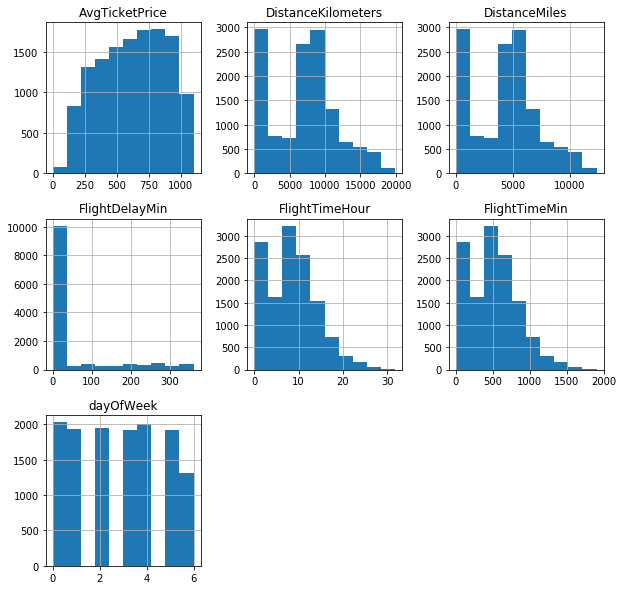

In [23]:
ed_numeric_fields.hist(figsize=[10,10])
plt.show()

Compare with pandas

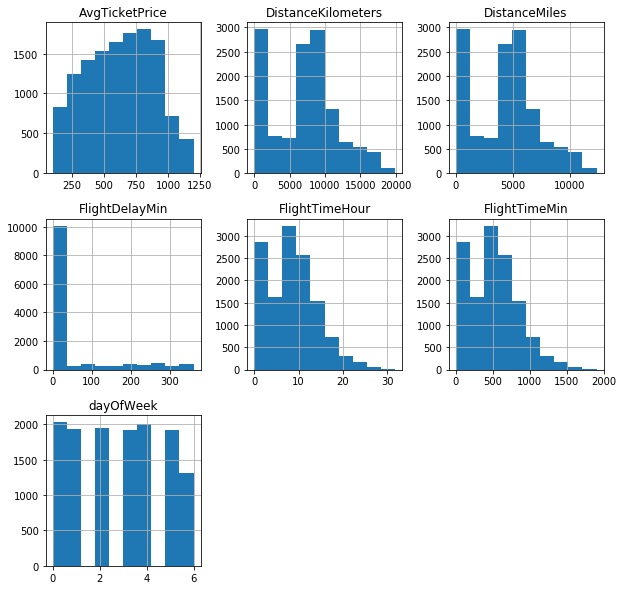

In [24]:
pd_flights.select_dtypes(include=[np.number]).hist(figsize=[10,10])
plt.show()

## Filtering

In [25]:
ed_jetbeats_routes = ed_flights[(ed_flights.Carrier == 'JetBeats') & (ed_flights.Cancelled == True)]

ed_jetbeats_routes = ed_jetbeats_routes[['OriginAirportID', 'DestAirportID']]

In [26]:
ed_jetbeats_routes

,OriginAirportID,DestAirportID
77,AICM,MAN
125,RM11,CTS
131,CTU,RM11
156,AICM,RST
175,TV01,XIY
195,GMP,RM11
227,DWC,BNA
245,ITM,UIO
257,UIO,EZE
304,ITM,SJU


Compare with pandas

In [27]:
ed_jetbeats_routes.tail()

,OriginAirportID,DestAirportID
12729,BNE,CPT
12745,CGN,YYZ
12871,TPA,TV01
12955,ZRH,ZRH
13003,TO11,WAW


In [28]:
pd_jetbeats_routes = pd_flights[(pd_flights.Carrier == 'JetBeats') & (pd_flights.Cancelled == True)]

pd_jetbeats_routes = pd_jetbeats_routes[['OriginAirportID', 'DestAirportID']]

In [29]:
pd_jetbeats_routes.tail()

,OriginAirportID,DestAirportID
12729,BNE,CPT
12745,CGN,YYZ
12871,TPA,TV01
12955,ZRH,ZRH
13003,TO11,WAW


In [30]:
ed_flights.iloc[10:15, 0:3]

,AvgTicketPrice,Cancelled,Carrier
10,906.437948,False,JetBeats
11,704.463771,False,Logstash Airways
12,922.499077,True,Logstash Airways
13,374.959276,False,Logstash Airways
14,552.917371,False,Logstash Airways


In [31]:
pd_flights.iloc[10:15, 0:3]

,AvgTicketPrice,Cancelled,Carrier
10,906.437948,False,JetBeats
11,704.463771,False,Logstash Airways
12,922.499077,True,Logstash Airways
13,374.959276,False,Logstash Airways
14,552.917371,False,Logstash Airways


## Elasticsearch/Pandas Interoperability

**`eland` DataFrame to `pandas` DataFrame**

In [32]:
pd_df = ed_jetbeats_routes._to_pandas()

In [33]:
pd_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 441 entries, 77 to 13003
Data columns (total 2 columns):
OriginAirportID    441 non-null object
DestAirportID      441 non-null object
dtypes: object(2)
memory usage: 10.3+ KB


In [34]:
ed_jetbeats_routes.info()

<class 'eland.dataframe.DataFrame'>
Index: 441 entries, 77 to 13003
Data columns (total 2 columns):
OriginAirportID    441 non-null object
DestAirportID      441 non-null object
dtypes: object(2)
memory usage: 80.0 bytes


**`pandas` DataFrame to `eland` DataFrame (Elasticsearch index)**

In [35]:
print(es.cat.indices('e*'))

green  open ecommerce-customer-sales             G2ZbWrUjQdGW9A4YoVmkig 1 0  3320 0 377.2kb 377.2kb
yellow open ecommerce                            _EcfrcYuRKGNcPE9dkMBMg 1 1  4675 0   4.4mb   4.4mb
yellow open electrical-grid-stability            GnxO5cN4TzyQQdrB8AhuhA 1 1 10000 0   3.6mb   3.6mb
yellow open ed_jetbeats_routes                   06QSjoVQS5W8K2esGaqOkA 1 1   441 0  19.3kb  19.3kb
yellow open electrical-grid-stability_regression -imErXhsSZmrIan6yeWEyQ 1 1 10000 0   4.1mb   4.1mb



In [36]:
ed.pandas_to_es(pd_df, "localhost", "ed_jetbeats_routes", if_exists="replace", refresh=True)

print(es.cat.indices('e*'))

green  open ecommerce-customer-sales             G2ZbWrUjQdGW9A4YoVmkig 1 0  3320 0 377.2kb 377.2kb
yellow open ecommerce                            _EcfrcYuRKGNcPE9dkMBMg 1 1  4675 0   4.4mb   4.4mb
yellow open electrical-grid-stability            GnxO5cN4TzyQQdrB8AhuhA 1 1 10000 0   3.6mb   3.6mb
yellow open ed_jetbeats_routes                   RIYR5oZHScSx2ZI4-4Qiug 1 1   441 0  19.2kb  19.2kb
yellow open electrical-grid-stability_regression -imErXhsSZmrIan6yeWEyQ 1 1 10000 0   4.1mb   4.1mb



In [37]:
ed_df = ed.DataFrame("localhost", "ed_jetbeats_routes")

In [38]:
ed_df.info()

<class 'eland.dataframe.DataFrame'>
Index: 441 entries, 77 to 13003
Data columns (total 2 columns):
DestAirportID      441 non-null object
OriginAirportID    441 non-null object
dtypes: object(2)
memory usage: 80.0 bytes


## CSV Interoperability

In [39]:
import glob
import os

#os.remove('ed_df.csv')

glob.glob('*.csv')

['ed_df.csv']

In [40]:
ed_df.to_csv('ed_df.csv')

In [41]:
glob.glob('*.csv')

['ed_df.csv']

In [42]:
pd_csv = pd.read_csv('ed_df.csv', index_col=0)

In [43]:
pd_csv.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 441 entries, 77 to 13003
Data columns (total 2 columns):
DestAirportID      441 non-null object
OriginAirportID    441 non-null object
dtypes: object(2)
memory usage: 10.3+ KB
